In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [93]:
df=pd.read_csv("Downloads\Segmentation.csv")

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
df.shape

(200, 5)

In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Exploratory data analysis

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


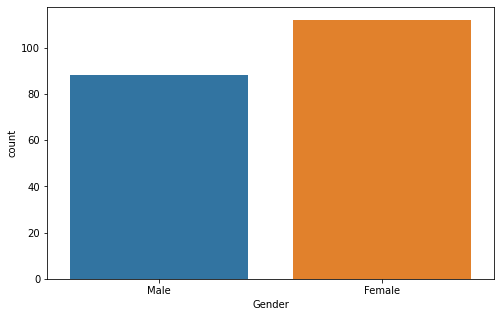

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(df.Gender)
plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


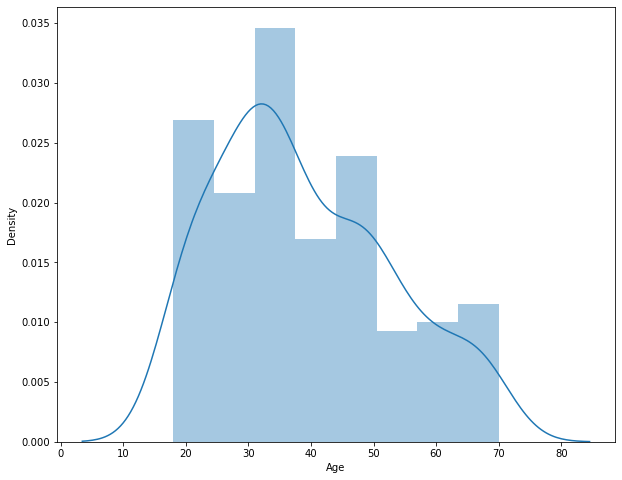

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


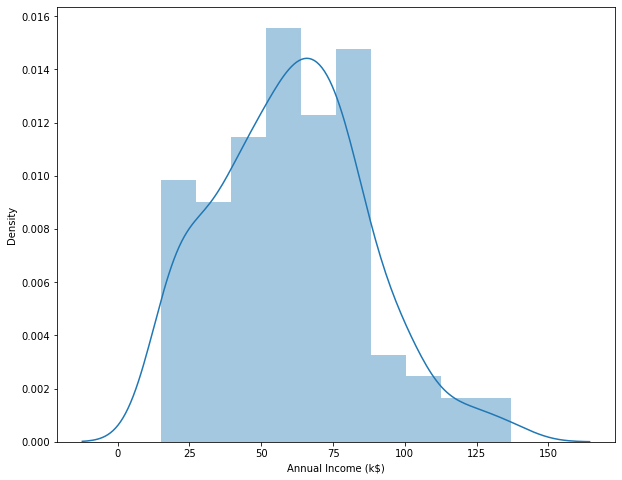

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


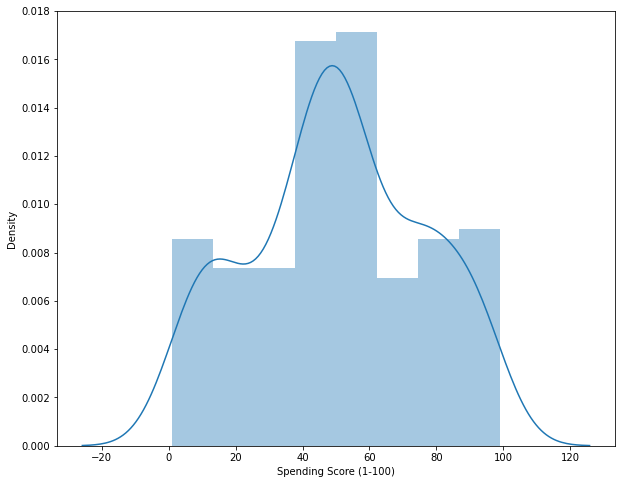

In [100]:
for x in df.iloc[:,2:5]:
    plt.figure(figsize=(10,8))
    sns.distplot(df[x])
    plt.show()



In [101]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

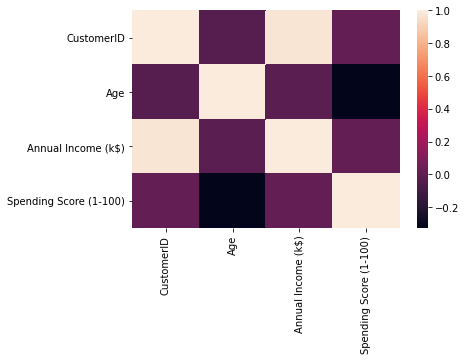

In [102]:
sns.heatmap(df.corr())

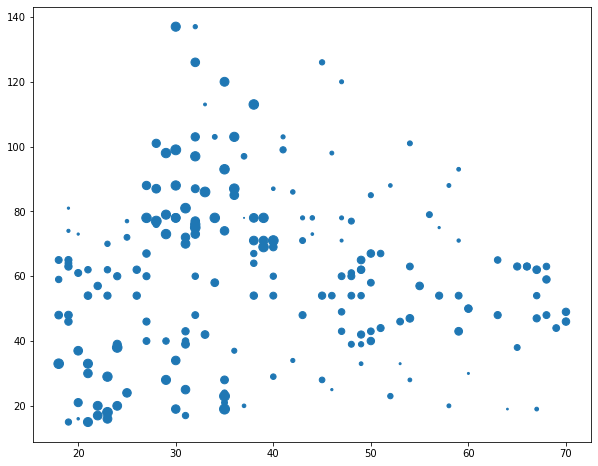

In [103]:
plt.figure(figsize=(10,8))
plt.scatter(df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

# outliers

In [116]:
outliers=df.select_dtypes(exclude='object')
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    
    iqr=q1-q3
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    print("iqr of",i,"=",iqr)
    print("upperbound",i,"=",ub)
    print("lowerbound",i,"=",lb)
    print('number of outliers in',i,'=',(df.shape[0]-df[(df[i]<ub)& (df[i]>lb)].shape[0]))
    
       
    

iqr of Gender = -1.0
upperbound Gender = -0.5
lowerbound Gender = 1.5
number of outliers in Gender = 200
iqr of Age = -20.25
upperbound Age = 18.625
lowerbound Age = 59.125
number of outliers in Age = 200
iqr of Annual Income (k$) = -36.5
upperbound Annual Income (k$) = 23.25
lowerbound Annual Income (k$) = 96.25
number of outliers in Annual Income (k$) = 200
iqr of Spending Score (1-100) = -38.25
upperbound Spending Score (1-100) = 15.625
lowerbound Spending Score (1-100) = 92.125
number of outliers in Spending Score (1-100) = 200
iqr of cluster = -1.0
upperbound cluster = -0.5
lowerbound cluster = 1.5
number of outliers in cluster = 200


# feature engineering

In [105]:
# one hot encoding
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [106]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [107]:
df.drop('CustomerID',axis=1,inplace=True)

In [108]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [142]:
# segmentation
x=df.iloc[:,1:4]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [110]:
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [111]:
cluster=km.predict(x)

In [112]:
df['cluster']=cluster

In [113]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [147]:
k_range=range(1,10)
sme=[]
for k in k_range:
    km1=KMeans(n_clusters=k,init='k-means++')
    fit=km1.fit(x)
    sme.append(km1.inertia_)

    

C:\Users\GUDA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


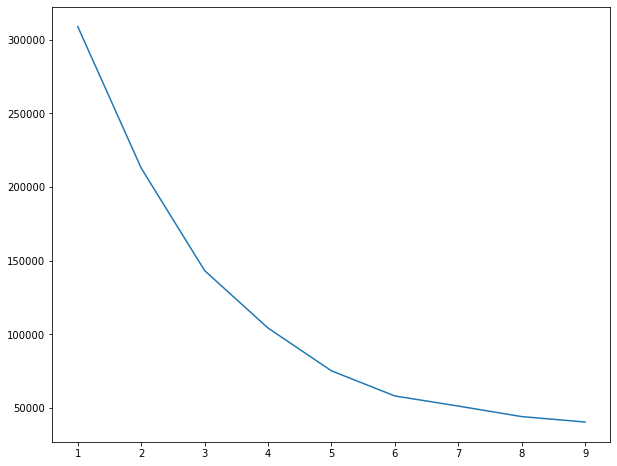

In [151]:
plt.figure(figsize=(10,8))
plt.plot(k_range,sme)
plt.show()

In [132]:
km1.cluster_centers_

array([[ 32.625     ,  80.375     ,  82.9375    ],
       [ 56.15555556,  53.37777778,  49.08888889],
       [ 41.96      ,  79.64      ,  15.4       ],
       [ 27.06666667,  38.6       ,  52.13333333],
       [ 24.85      ,  24.95      ,  81.        ],
       [ 33.        , 114.71428571,  78.42857143],
       [ 46.15789474,  26.10526316,  17.42105263],
       [ 41.        , 109.7       ,  22.        ],
       [ 27.        ,  61.96296296,  47.77777778]])

In [152]:
km1=KMeans(n_clusters=6,init='k-means++',max_iter=20,random_state=3)
km1.fit(x)

KMeans(max_iter=20, n_clusters=6, random_state=3)

In [200]:
clusters=km1.predict(x)


In [155]:
df.drop('cluster',axis=1,inplace=True)

In [156]:
df['clusters']=clusters

In [157]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,2
4,0,31,17,40,3
